Xray Image Analysis

In [45]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imageio

from glob import glob

In [3]:
DIR = "images/"
xray_image = imageio.v3.imread(os.path.join(DIR, "00024719_000.png"))


In [46]:
trainImg = glob(DIR+"*.png")

In [47]:
trainImg.sort()
len(trainImg)

10000

In [4]:
print("the image shape of data: ", xray_image.shape)
print("the image data type: ", xray_image.dtype)

the image shape of data:  (1024, 1024)
the image data type:  uint8


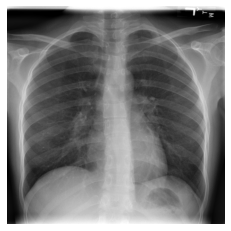

In [5]:
plt.imshow(xray_image, cmap="gray")
plt.axis("off")
plt.show()

In [6]:
num_imgs = 9

combined_xray_images_1 = np.array(
    [imageio.v3.imread(os.path.join(DIR, f"00027927_00{i}.png")) for i in range(num_imgs)]
)

In [7]:
combined_xray_images_1.shape

(9, 1024, 1024)

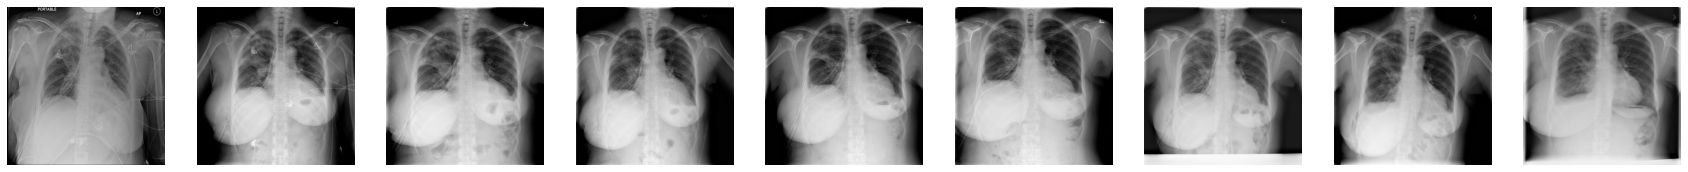

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=num_imgs, figsize=(30,30))
for img, ax in zip(combined_xray_images_1, axes):
    ax.imshow(img, cmap="gray")
    ax.axis("off")

In [9]:
GIF_PATH = os.path.join("xray_image.gif")
imageio.mimwrite(GIF_PATH,  combined_xray_images_1, format=".gif", fps=1)

to embed gif animation in notebook as markdown
== \<img src="FileName.gif" width="750" align="center">

<img src="xray_image.gif" width="750" align="center">

In [13]:
from scipy import ndimage

In [14]:
xray_image_laplace_gaussian = ndimage.gaussian_laplace(xray_image, sigma=1)

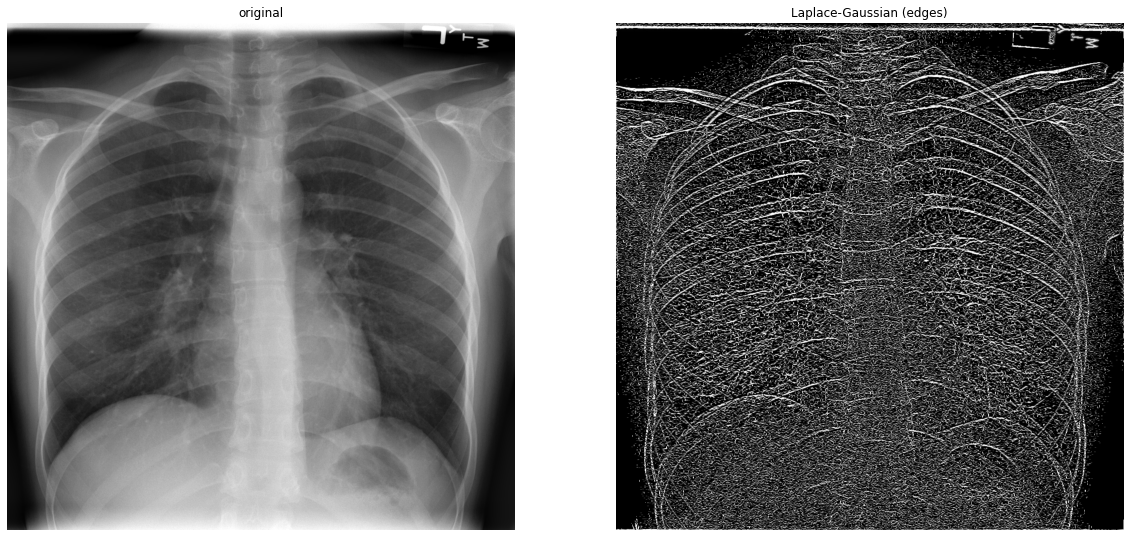

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,20))

axes[0].set_title("original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Laplace-Gaussian (edges)")
axes[1].imshow(xray_image_laplace_gaussian, cmap="gray")

for i in axes:
    i.axis("off")
plt.show()

In [18]:
xray_image_gaussian_gradient = ndimage.gaussian_gradient_magnitude(xray_image, sigma=2)

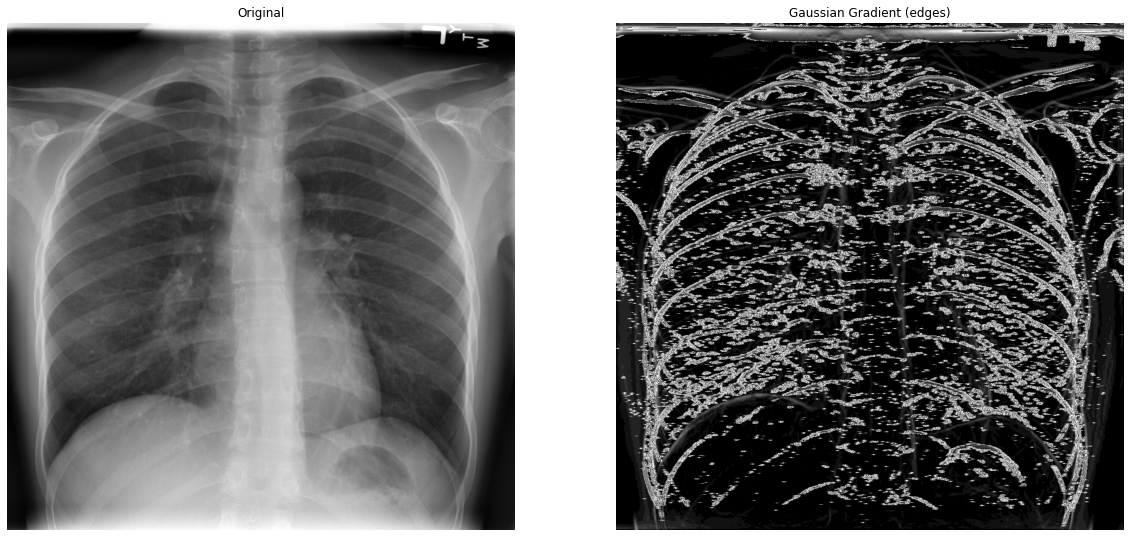

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,20))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Gaussian Gradient (edges)")
axes[1].imshow(xray_image_gaussian_gradient, cmap="gray")

for i in axes:
    i.axis("off")
plt.show()

In [21]:
x_sobel = ndimage.sobel(xray_image, axis=0)
y_sobel = ndimage.sobel(xray_image, axis=1)

xray_image_sobel = np.hypot(x_sobel, y_sobel)
xray_image_sobel *= 255.0/np.max(xray_image_sobel)

In [23]:
print("the data type - before: ", xray_image_sobel.dtype)
xray_image_sobel = xray_image_sobel.astype("float32")
print("The data type - after: ", xray_image_sobel.dtype)

the data type - before:  float16
The data type - after:  float32


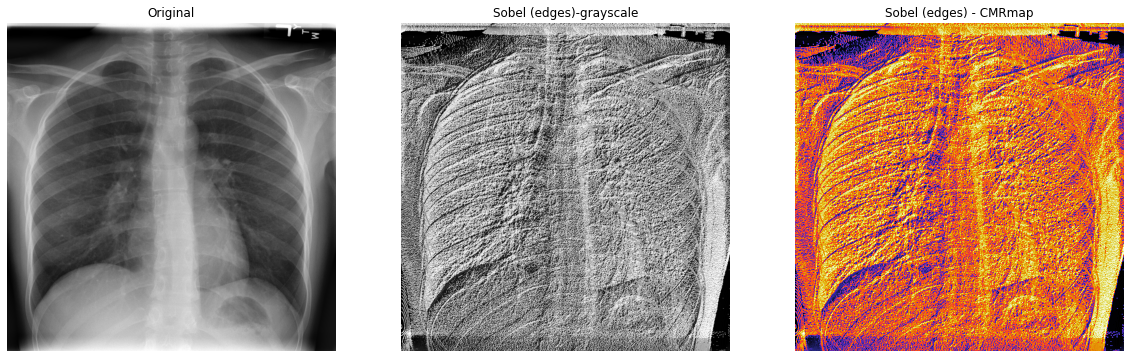

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,20))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Sobel (edges)-grayscale")
axes[1].imshow(xray_image_sobel, cmap="gray")
axes[2].set_title("Sobel (edges) - CMRmap")
axes[2].imshow(xray_image_sobel, cmap="CMRmap")

for i in axes:
    i.axis("off")
plt.show()

In [28]:
fourier_gaussian = ndimage.fourier_gaussian(xray_image, sigma=0.01)
x_prewitt = ndimage.prewitt(fourier_gaussian, axis=0)
y_prewitt = ndimage.prewitt(fourier_gaussian, axis=1)

In [29]:
xray_image_canny = np.hypot(x_prewitt, y_prewitt)

In [30]:
xray_image_canny *= 255.0/np.max(xray_image_canny)

In [31]:
print("The data type - ", xray_image_canny.dtype)

The data type -  float64


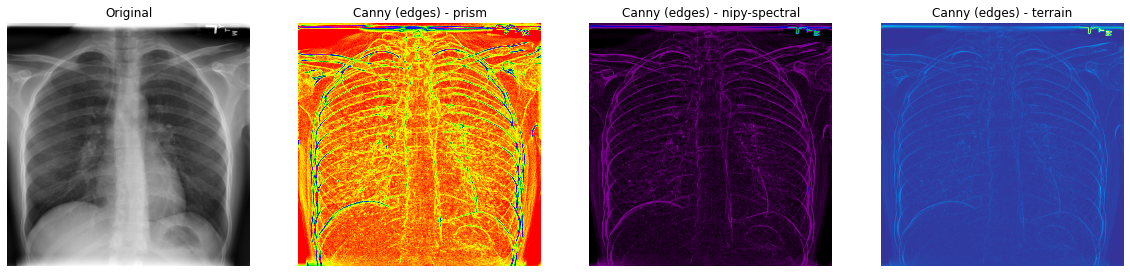

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,15))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Canny (edges) - prism")
axes[1].imshow(xray_image_canny, cmap="prism")
axes[2].set_title("Canny (edges) - nipy-spectral")
axes[2].imshow(xray_image_canny, cmap="nipy_spectral")
axes[3].set_title("Canny (edges) - terrain")
axes[3].imshow(xray_image_canny, cmap="terrain")

for i in axes:
    i.axis("off")
    
plt.show()

In [34]:
print("The data type of the xray image", xray_image.dtype)
print("The minimum pixel value ", np.min(xray_image))
print("The maximum pixel value ", np.max(xray_image))
print("The average pixel value ", np.mean(xray_image))
print("The median pixel value ", np.median(xray_image))

The data type of the xray image uint8
The minimum pixel value  0
The maximum pixel value  255
The average pixel value  108.19216442108154
The median pixel value  103.0


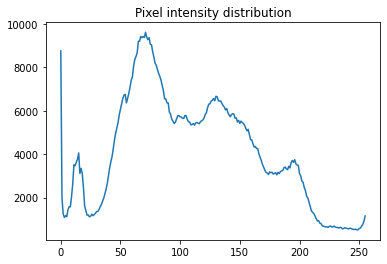

In [35]:
pixel_intensity_distribution = ndimage.histogram(
    xray_image, min=np.min(xray_image), max=np.max(xray_image), bins=256
)

plt.plot(pixel_intensity_distribution)
plt.title("Pixel intensity distribution")
plt.show()

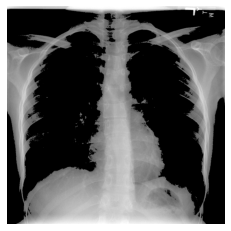

In [40]:
xray_image_mask_noisy = np.where(xray_image >100, xray_image, 0)
plt.imshow(xray_image_mask_noisy, cmap="gray")
plt.axis("off")
plt.show()

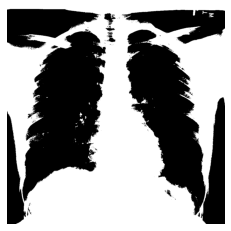

In [41]:
xray_image_mask_less_noisy = np.where(xray_image >100, 1, 0)
plt.imshow(xray_image_mask_less_noisy, cmap="gray")
plt.axis("off")
plt.show()

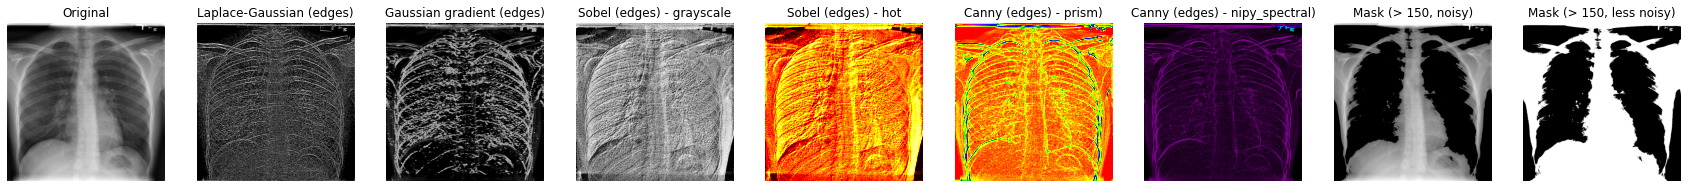

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 30))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Laplace-Gaussian (edges)")
axes[1].imshow(xray_image_laplace_gaussian, cmap="gray")
axes[2].set_title("Gaussian gradient (edges)")
axes[2].imshow(xray_image_gaussian_gradient, cmap="gray")
axes[3].set_title("Sobel (edges) - grayscale")
axes[3].imshow(xray_image_sobel, cmap="gray")
axes[4].set_title("Sobel (edges) - hot")
axes[4].imshow(xray_image_sobel, cmap="hot")
axes[5].set_title("Canny (edges) - prism)")
axes[5].imshow(xray_image_canny, cmap="prism")
axes[6].set_title("Canny (edges) - nipy_spectral)")
axes[6].imshow(xray_image_canny, cmap="nipy_spectral")
axes[7].set_title("Mask (> 150, noisy)")
axes[7].imshow(xray_image_mask_noisy, cmap="gray")
axes[8].set_title("Mask (> 150, less noisy)")
axes[8].imshow(xray_image_mask_less_noisy, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()